In [36]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df = pd.read_csv("/content/drive/MyDrive/Take_Home_Project/training_loan_data.csv")
df.head(5)

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,...,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,...,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


In [40]:
df.dtypes


,0
id,int64
member_id,float64
loan_amnt,int64
term,object
int_rate,object
emp_length,object
home_ownership,object
annual_inc,float64
desc,object
purpose,object


In [41]:
df = df.drop(['term', 'int_rate', 'emp_length', 'home_ownership', 'desc', 'purpose','revol_util'], axis=1)
df.head(5)

,id,member_id,loan_amnt,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,28000.0,100.0,96.0,8.40,0.0,17.0,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,55000.0,25.0,53.9,22.87,0.0,8.0,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,60000.0,0.0,15.9,4.62,1.0,3.0,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,325000.0,16.7,67.1,18.55,1.0,3.0,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,40000.0,33.3,79.6,16.94,0.0,17.0,7000.0,53.0,6471.462236,13605.0,1,157,0.0


In [42]:
print("origianl shape:", df.shape)
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

df = df.drop_duplicates()
print("number of processed rows (duplicated): ", df.shape)


df = df.dropna()
print("number of processed rows (NA rows): ", df.shape)


origianl shape: (199121, 16)
number of duplicate rows:  (1334, 16)
number of processed rows (duplicated):  (197787, 16)
number of processed rows (NA rows):  (29280, 16)


<Axes: xlabel='annual_inc'>

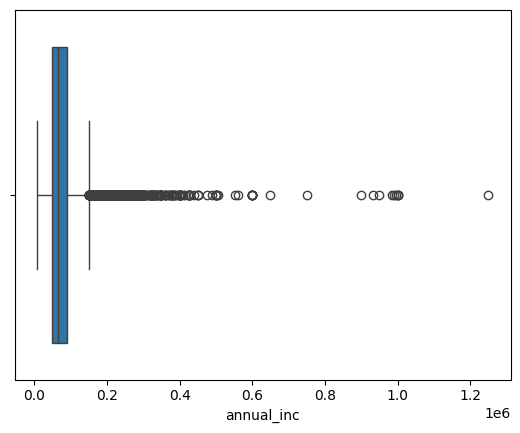

In [45]:
sns.boxplot(x=df['annual_inc'])

<Axes: xlabel='mths_since_recent_inq'>

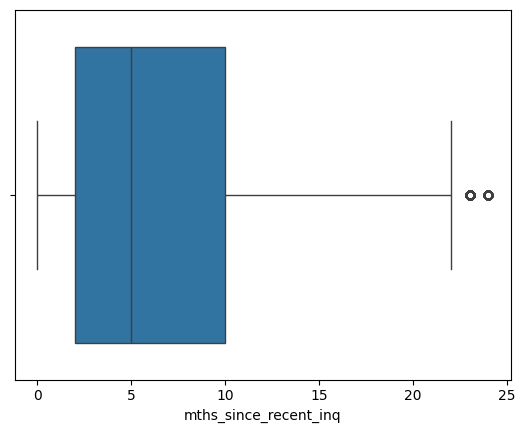

In [47]:
sns.boxplot(x=df['mths_since_recent_inq'])

<Axes: xlabel='total_bc_limit'>

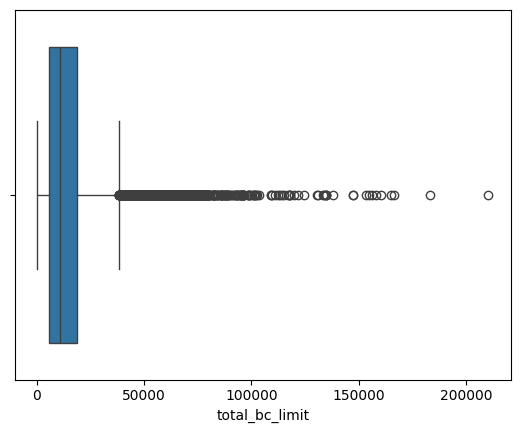

In [48]:
sns.boxplot(x=df['total_bc_limit'])

<Axes: xlabel='tot_cur_bal'>

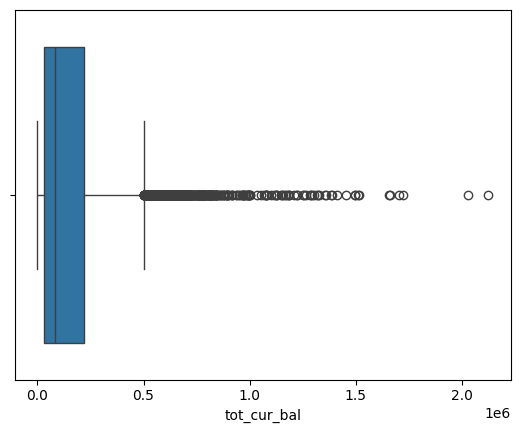

In [49]:
sns.boxplot(x=df['tot_cur_bal'])

<Axes: xlabel='internal_score'>

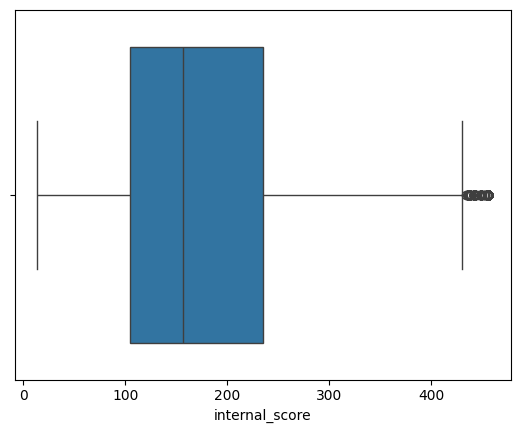

In [50]:
sns.boxplot(x=df['internal_score'])